# Multiple Linear Regression
## Medical Insurance Case Study

#### Problem Statement:

Consider a life insurance company has a dataset containing the medical insurance cost for customers in Hanoi city of Vietnam. It wishes to use the data to optimise the insurance costs of customers based on important factors such as bmi, age, smoking habits, sex etc.

Essentially, the company wants —


- To identify the variables affecting insurance charges, e.g. bmi, age, smoking habits, sex etc.
- To create a linear model that quantitatively relates insurance charges with variables such as bmi, age, smoking habits, sex group etc.

- Diagnose p-values & VIF for better model accuracy


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [77]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [78]:
import numpy as np
import pandas as pd

In [79]:
insurance = pd.read_csv("insurance.csv")

In [80]:
# Check the head of the dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
insurance.shape

(1338, 7)

In [82]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

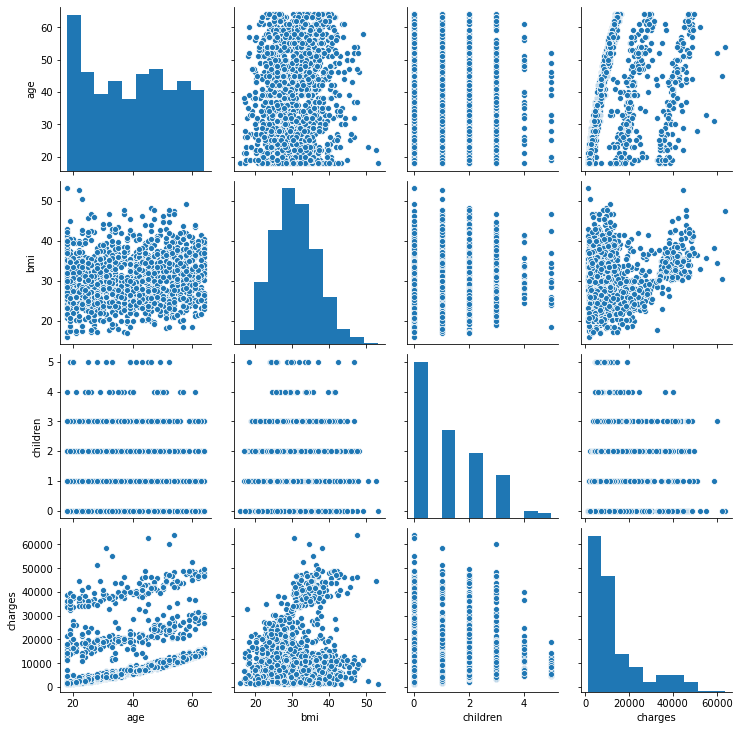

In [85]:
sns.pairplot(insurance)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

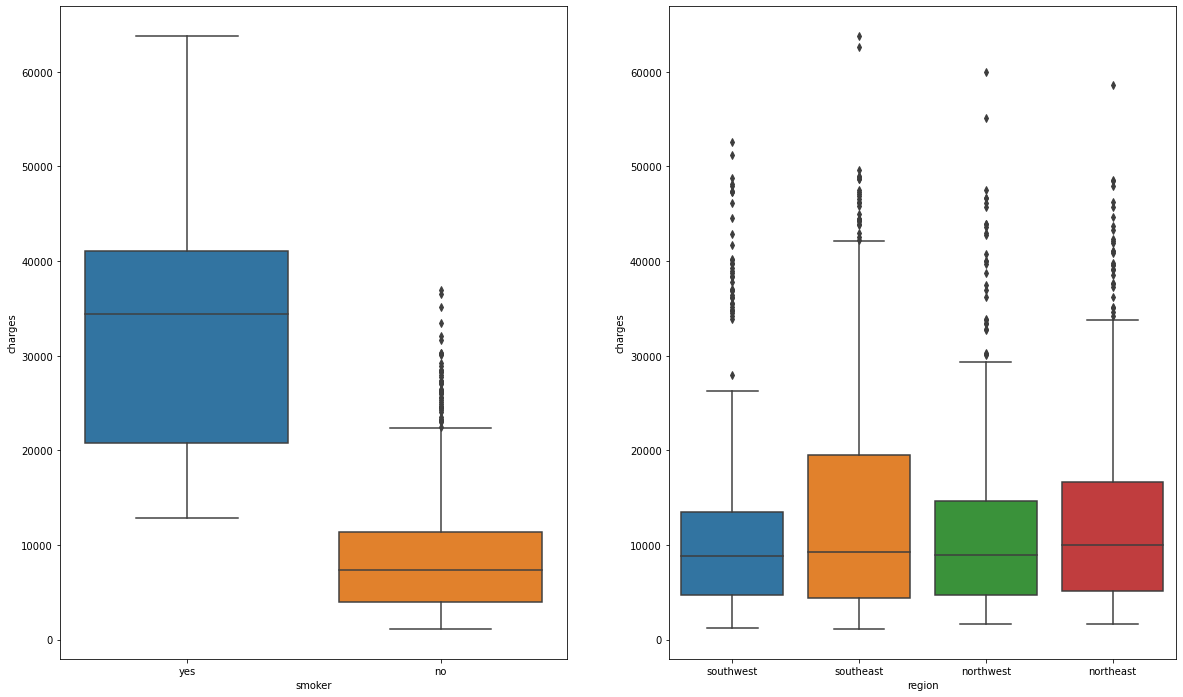

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'smoker', y = 'charges', data = insurance)
plt.subplot(1,2,2)
sns.boxplot(x = 'region', y = 'charges', data = insurance)

plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [88]:
# List of variables to map

varlist =  ['smoker']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the insurance list
insurance[varlist] = insurance[varlist].apply(binary_map)

In [89]:
# Check the insurance dataframe now

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


### Dummy Variables

The variable `region` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [90]:
# Get the dummy variables for the feature 'region' and store it in a new variable - 'locale'
locale = pd.get_dummies(insurance['region'])

In [91]:
# Check what the dataset 'locale' looks like
locale.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need four columns. You can drop the `northeast` column, as the type of furnishing can be identified with just the last three columns where — 
- `1000` will correspond to `northeast`
- `0100` will correspond to `northwest`
- `0010` will correspond to `southeast`
- `0001` will correspond to `southwest`

In [92]:
# Let's drop the first column from locale df using 'drop_first = True'

locale = pd.get_dummies(insurance['region'], drop_first = True)

In [93]:
# Add the results to the original insurance dataframe

insurance = pd.concat([insurance, locale], axis = 1)

In [94]:
# Now let's see the head of our dataframe.

insurance.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0,0,1
1,18,male,33.770,1,0,southeast,1725.55230,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,1,0,0


In [95]:
varlist1 =  ['sex']

# Defining the map function
def binary_map(x):
    return x.map({'female': 1, "male": 0})

# Applying the function to the insurance list
insurance[varlist1] = insurance[varlist1].apply(binary_map)

In [96]:
# Drop 'region' as we have created the dummies for it

insurance.drop(['region'], axis = 1, inplace = True)

In [97]:
insurance.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [98]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(insurance, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()

In [101]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['age', 'bmi', 'children', 'charges']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [102]:
df_train.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
966,0.717391,0,0.237692,0.4,1,0.364661,1,0,0
522,0.717391,1,0.483051,0.0,0,0.139579,0,0,0
155,0.565217,0,0.633844,0.0,0,0.093008,1,0,0
671,0.239130,1,0.408932,0.0,0,0.045040,0,0,0
1173,0.434783,0,0.357815,0.4,0,0.085173,1,0,0


In [103]:
df_train.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.458171,0.502137,0.399088,0.220513,0.194444,0.192301,0.244658,0.282051,0.242521
std,0.306065,0.500263,0.167115,0.241223,0.395984,0.193690,0.430114,0.450239,0.428837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.277441,0.000000,0.000000,0.055033,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.391176,0.200000,0.000000,0.129662,0.000000,0.000000,0.000000
75%,0.717391,1.000000,0.512039,0.400000,0.000000,0.245247,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


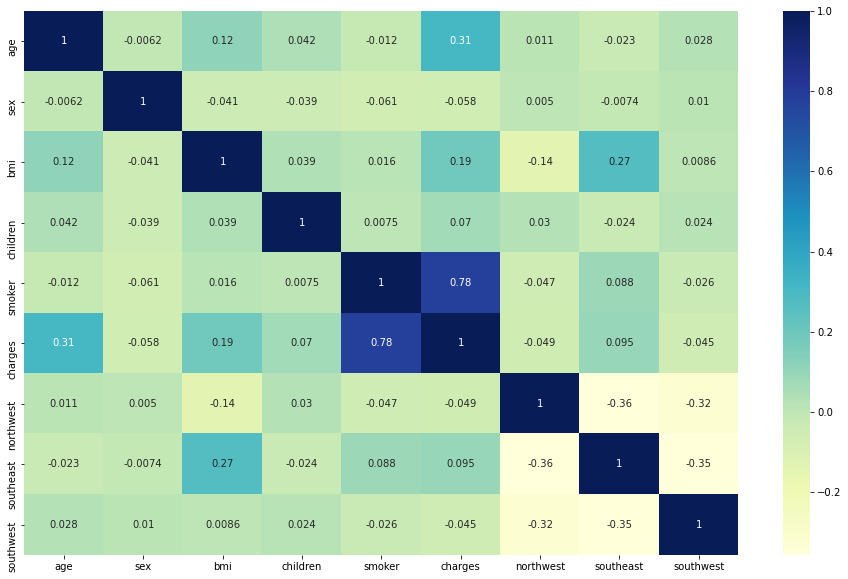

In [104]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `age` seems to have a good correlation to `charges` . Let's see a pairplot for `age` vs `charges`.

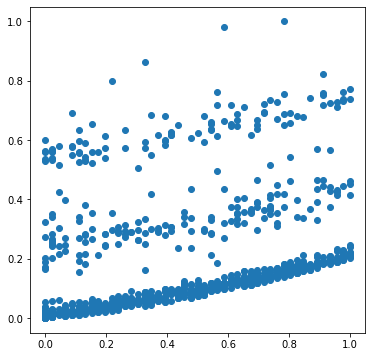

In [106]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.age, df_train.charges)
plt.show()

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [107]:
y_train = df_train.pop('charges')
X_train = df_train

### Adding all the variables to the model

In [110]:
# Check all the columns of the dataframe

insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [111]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const       -3.315549e-02
age          1.909235e-01
sex          9.907459e-07
bmi          1.718790e-01
children     3.770451e-02
smoker       3.829350e-01
northwest   -1.205788e-02
southeast   -1.502674e-02
southwest   -2.556666e-02
dtype: float64

In [112]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     326.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          2.08e-263
Time:                        15:08:11   Log-Likelihood:                 835.42
No. Observations:                 936   AIC:                            -1653.
Df Residuals:                     927   BIC:                            -1609.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0332      0.012     -2.858      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,5.00
0,age,2.95
6,southeast,2.23
7,southwest,1.84
1,sex,1.81
3,children,1.77
5,northwest,1.73
4,smoker,1.23


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `sex` as it has a very high p-value of `1.000`. Other variables like `southeast`,`northwest` have a high value of 0.113 and 0.203. We will also remove `southwest` because it is related to the locale df. Let's go ahead and drop this variables

In [116]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(['sex', 'southeast','southwest','northwest'], 1,)

In [117]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [118]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          2.76e-267
Time:                        15:11:24   Log-Likelihood:                 831.76
No. Observations:                 936   AIC:                            -1654.
Df Residuals:                     931   BIC:                            -1629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0435      0.010     -4.438      0.0

In [119]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,3.19
0,age,2.77
2,children,1.72
3,smoker,1.21


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [121]:
y_train_price = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

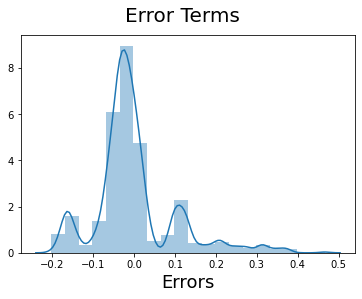

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [123]:
num_vars = ['age', 'bmi', 'children', 'charges']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [124]:
df_test.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.467662,0.477612,0.387383,0.215423,0.228856,0.197677,0.238806,0.248756,0.243781
std,0.304236,0.500121,0.156621,0.241072,0.420620,0.192579,0.426885,0.432831,0.429897
min,0.000000,0.000000,0.023002,0.000000,0.000000,0.000154,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278585,0.000000,0.000000,0.060686,0.000000,0.000000,0.000000
50%,0.478261,0.000000,0.383105,0.200000,0.000000,0.138259,0.000000,0.000000,0.000000
75%,0.733696,1.000000,0.483051,0.400000,0.000000,0.254641,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.890503,1.000000,1.000000,0.940158,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [125]:
y_test = df_test.pop('charges')
X_test = df_test

In [126]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [128]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["sex", "northwest", "southeast", "southwest"], axis = 1)

In [130]:
# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

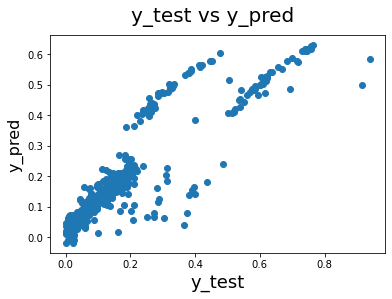

In [131]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cost = -0.0435 +  0.1907 \times  age + 0.1649  \times  bmi + 0.0368 \times children + 0.3828 \times smoker  $
